In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 3]
import torch
import rising.transforms as rtr
from rising.loading import DataLoader, default_transform_call
from rising.random import DiscreteParameter, UniformParameter
from datetime import datetime

In [2]:
bench_data = np.load('ct_train_1001_image.256256128.npy')
bench_data = np.expand_dims(bench_data, axis=(0))
bench_data = torch.from_numpy(bench_data)
print(bench_data.shape)

torch.Size([1, 256, 256, 128])


## Benchmark Flip

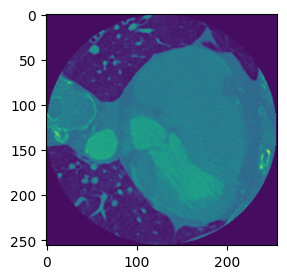

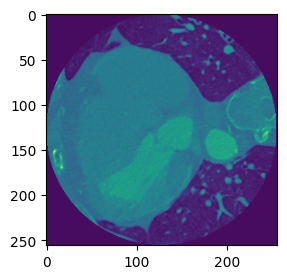

In [3]:
batch = {
    "data": bench_data,
}
def apply_transform(trafo, batch):
    transformed = trafo(**batch)
    return transformed

flip_transform = rtr.Mirror(dims=(0,),prob = 1.0)
transformed_tensor = flip_transform(**batch)

plt.imshow(bench_data.numpy()[0][:,:,54])
plt.show()
plt.imshow(transformed_tensor['data'].numpy()[0][:,:,54])
plt.show()

In [4]:
start_time = datetime.now()

for i in range(1000):
    transformed_tensor = flip_transform(**batch)
    
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 1000)
print((float(time/1000) / 1000000), 'millisec')

10859998 nanoseconds
10.859998 millisec


## Benchmark Crop

torch.Size([1, 256, 256, 128])
torch.Size([1, 256, 100, 100])


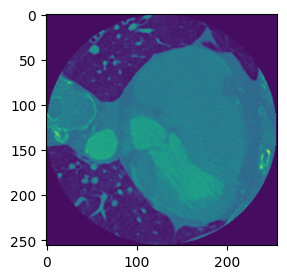

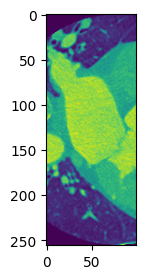

In [5]:
batch = {
    "data": bench_data,
}
def apply_transform(trafo, batch):
    transformed = trafo(**batch)
    return transformed

print(batch['data'].shape)


crop_transform = rtr.RandomCrop(size=(100,100,200,1,))
transformed_tensor = crop_transform(**batch)

print(transformed_tensor['data'].shape)

plt.imshow(bench_data.numpy()[0][:,:,54])
plt.show()
plt.imshow(transformed_tensor['data'].numpy()[0][:,:,42])
plt.show()

In [6]:
x = 0

start_time = datetime.now()

for i in range(100000):
    transformed_tensor = crop_transform(**batch)
    x = transformed_tensor['data'][0,0,0]
    
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 100000)
print((float(time/100000) / 1000000), 'millisec')

86799 nanoseconds
0.086799 millisec


## Benchmark Resize

torch.Size([1, 1, 256, 256, 128])
torch.Size([1, 1, 200, 200, 100])


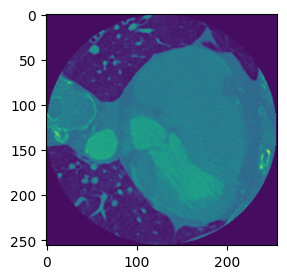

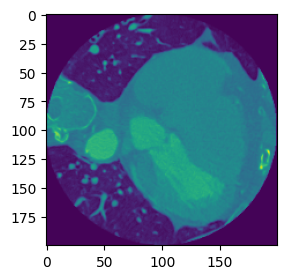

In [7]:
batch = {
    "data": bench_data[None,:,:,:,:],
}
def apply_transform(trafo, batch):
    transformed = trafo(**batch)
    return transformed

print(batch['data'].shape)


resize_transform = rtr.ResizeNative(size = (200,200,100), mode='trilinear')
transformed_tensor = resize_transform(**batch)

print(transformed_tensor['data'].shape)

plt.imshow(bench_data.numpy()[0][:,:,54])
plt.show()
plt.imshow(transformed_tensor['data'].numpy()[0,0][:,:,42])
plt.show()


In [8]:
x = 0

start_time = datetime.now()

for i in range(1000):
    transformed_tensor = resize_transform(**batch)
    x = transformed_tensor['data'][0,0,0]
    
    
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 1000)
print((float(time/1000) / 1000000), 'millisec')

16580061 nanoseconds
16.580061 millisec


## Add noise

torch.Size([1, 256, 256, 128])
torch.Size([1, 256, 256, 128])


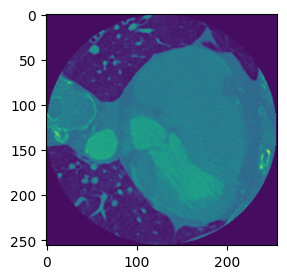

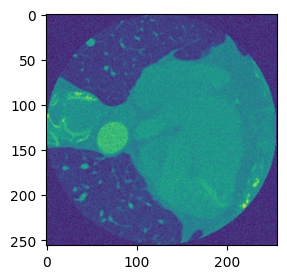

In [9]:
batch = {
    "data": bench_data,
}
def apply_transform(trafo, batch):
    transformed = trafo(**batch)
    return transformed

print(batch['data'].shape)


noise_transform = rtr.GaussianNoise(0., 100)
transformed_tensor = noise_transform(**batch)

print(transformed_tensor['data'].shape)

plt.imshow(bench_data.numpy()[0][:,:,54])
plt.show()
plt.imshow(transformed_tensor['data'].numpy()[0][:,:,42])
plt.show()

In [10]:
x = 0

start_time = datetime.now()

for i in range(100):
    transformed_tensor = noise_transform(**batch)
    x = transformed_tensor['data'][0,0,0]
    
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 100)
print((float(time/100) / 1000000), 'millisec')

174343070 nanoseconds
174.34307 millisec


## Add blur

torch.Size([1, 256, 256, 128])
torch.Size([1, 256, 254, 126])


C:\Users\vasiliev\miniconda3\envs\pytorch\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


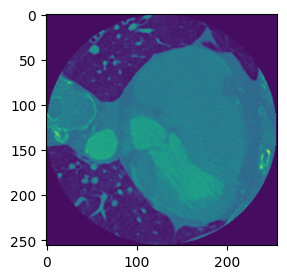

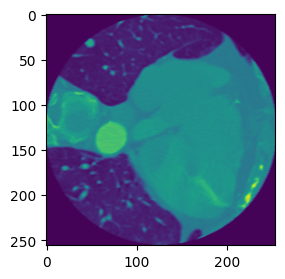

In [11]:
batch = {
    "data": bench_data.float(),
}
def apply_transform(trafo, batch):
    transformed = trafo(**batch)
    return transformed

print(batch['data'].shape)


blur_transform = rtr.GaussianSmoothing(in_channels=256, kernel_size=3, std=(100, 200), keys=["data"])
transformed_tensor = blur_transform(**batch)

print(transformed_tensor['data'].shape)

plt.imshow(bench_data.numpy()[0][:,:,54])
plt.show()
plt.imshow(transformed_tensor['data'].numpy()[0][:,:,42])
plt.show()

In [12]:
x = 0

start_time = datetime.now()

for i in range(1000):
    transformed_tensor = blur_transform(**batch)
    x = transformed_tensor['data'][0,0,0]
    
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 1000)
print((float(time/1000) / 1000000), 'millisec') 

25920031 nanoseconds
25.920031 millisec


## Bench rotate

torch.Size([1, 256, 256, 128])
torch.Size([1, 256, 256, 128])


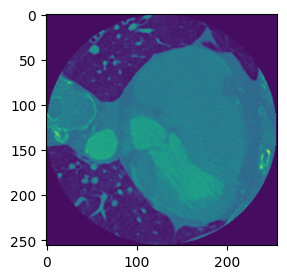

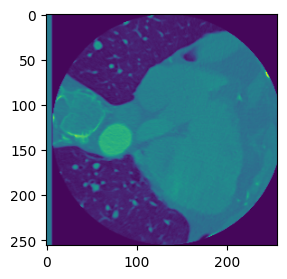

In [13]:
batch = {
    "data": bench_data.float(),
}
def apply_transform(trafo, batch):
    transformed = trafo(**batch)
    return transformed

print(batch['data'].shape)


affine_transform = rtr.BaseAffine(
    scale=UniformParameter(0.9, 1.2),
    rotation=UniformParameter(-10, 10), degree=True)

transformed_tensor = affine_transform(**batch)

print(transformed_tensor['data'].shape)

plt.imshow(bench_data.numpy()[0][:,:,54])
plt.show()
plt.imshow(transformed_tensor['data'].numpy()[0][:,:,42])
plt.show()

In [14]:
x = 0

start_time = datetime.now()

for i in range(100):
    transformed_tensor = affine_transform(**batch)
    x = transformed_tensor['data'][0,0,0]
    
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 100)
print((float(time/100) / 1000000), 'millisec')     

60550000 nanoseconds
60.55 millisec
